# Project: Analyzing Macbeth

## Introduction
For our first day and first data science project, we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

ACTUALLY BEGINS AT CHAR 16648:len(macbeth)

In [7]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[16648:20500])

<class 'str'>
120253
The Tragedie of Macbeth

Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge and filthie ayre.

Exeunt.


Scena Secunda.

Alarum within. Enter King, Malcome, Donalbaine, Lenox, with
attendants, meeting a bleeding Captaine.

  King. What bloody man is that? he can report,
As seemeth by his plight, of the Reuolt
The newest state

   Mal. This is the Serieant,
Who like a good and hardie Souldier fought
'Gainst my Captiuitie: Haile braue friend;
Say to the King, the knowledge of the Broyle,
As thou didst leaue it

   Cap. Doubtfull it stood,
As two spent Swimmers, that doe c

## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

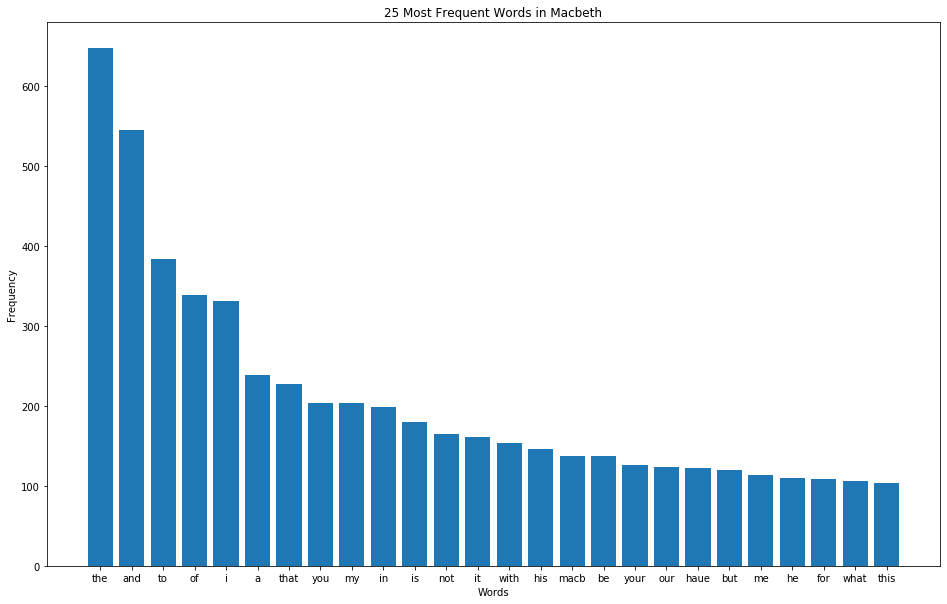

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

noheadermacbeth = macbeth[16648:]

macbeth_dirty_words_list = noheadermacbeth.split()

clean_words = []

for dirty_word in macbeth_dirty_words_list:
    
    dirty_word = dirty_word.lower() # changes all words to lower case
    
    prefixes = ["(", "'","\"" ]
    suffixes = [".", ",", ")", ":", ";", "'", "?", "\"", "!"]
    
    if dirty_word.startswith(tuple(prefixes)):  #gets rid of prefixes
        clean_words.append(dirty_word[1:])
        
    elif dirty_word.endswith(tuple(suffixes)): #gets rid of suffixes
        clean_words.append(dirty_word[0:-1])
        
    else: clean_words.append(dirty_word)      #appends words w/o prefixes or suffixes
        
#print(clean_words[0:200])

macbeth_word_dict = {}

for word in clean_words:
    if macbeth_word_dict.get(word) == None:
        macbeth_word_dict[word] = 1
    else:
        macbeth_word_dict[word] += 1
        
reverse_sorted_dictionary = sorted(macbeth_word_dict.items(), key=lambda x: x[1])

correct_sort_order = []

while len(correct_sort_order) <= 25:
    correct_sort_order.append(reverse_sorted_dictionary[-1])
    reverse_sorted_dictionary.pop()
   

#x-values
words = []  
for i in range(0,len(correct_sort_order)):
    words.append(correct_sort_order[i][0])

#y-values
freq = []  
for i in range(0,len(correct_sort_order)):
    freq.append(correct_sort_order[i][1])

ypos = np.arange(len(words))

plt.figure(figsize=(16,10))
                 
plt.bar(ypos, freq, width=0.8, bottom=None, align='center', data=None)  
                 
#(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

                 
plt.title("25 Most Frequent Words in Macbeth")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(ypos, words)

plt.show()

    


## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!